Using example on https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ipycytoscape as ic
import os
import sys
sys.path.append(os.path.join('..', 'algorithm'))
from algorithm.spectral_clustering import get_spectral_input_from_cytoscape_json
from algorithm.spectral_clustering import SpectralClusterer

In [2]:
data = {'nodes': 
         [{'data': {'id': 'n0', 'name': 'Node 0', 'colour': 'green'}},
          {'data': {'id': 'n1', 'name': 'Node 1', 'colour': 'green'}},
          {'data': {'id': 'n2', 'name': 'Node 2', 'colour': 'green'}},
          {'data': {'id': 'n3', 'name': 'Node 3', 'colour': 'green'}},
          {'data': {'id': 'n4', 'name': 'Node 4', 'colour': 'green'}},
          {'data': {'id': 'n5', 'name': 'Node 5', 'colour': 'green'}},
          {'data': {'id': 'n6', 'name': 'Node 6', 'colour': 'green'}},
          {'data': {'id': 'n7', 'name': 'Node 7', 'colour': 'green'}},
          {'data': {'id': 'n8', 'name': 'Node 8', 'colour': 'green'}},
          {'data': {'id': 'n9', 'name': 'Node 9', 'colour': 'green'}}],
        'edges': 
        [{'data': {'id': 'n0-n5', 'source': 'n0', 'target': 'n5'}},
         {'data': {'id': 'n0-n1', 'source': 'n0', 'target': 'n1'}},
         {'data': {'id': 'n0-n2', 'source': 'n0', 'target': 'n2'}},
         {'data': {'id': 'n0-n8', 'source': 'n0', 'target': 'n8'}},
         {'data': {'id': 'n0-n9', 'source': 'n0', 'target': 'n9'}},
         {'data': {'id': 'n1-n2', 'source': 'n1', 'target': 'n2'}},
         {'data': {'id': 'n8-n9', 'source': 'n8', 'target': 'n9'}},
         {'data': {'id': 'n5-n3', 'source': 'n5', 'target': 'n3'}},
         {'data': {'id': 'n5-n4', 'source': 'n5', 'target': 'n4'}},
         {'data': {'id': 'n5-n6', 'source': 'n5', 'target': 'n6'}},
         {'data': {'id': 'n5-n7', 'source': 'n5', 'target': 'n7'}},
         {'data': {'id': 'n3-n4', 'source': 'n3', 'target': 'n4'}},
         {'data': {'id': 'n6-n7', 'source': 'n6', 'target': 'n7'}}]
       }

In [3]:
cytoscapeobj = ic.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(data)
cytoscapeobj.set_style([{
                        'selector': 'node',
                        'css': {
                            'content': 'data(name)',
                            'text-valign': 'center',
                            'color': 'white',
                            'text-outline-width': 2,
                            'text-outline-color': 'green',
                            'background-color': 'data(colour)'
                        }
                        },
                        {
                        'selector': ':selected',
                        'css': {
                            'background-color': 'black',
                            'line-color': 'black',
                            'target-arrow-color': 'black',
                            'source-arrow-color': 'black',
                            'text-outline-color': 'black'
                        }}
                        ])
display(cytoscapeobj)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…

In [4]:
degrees, adjacencies, node_ids = get_spectral_input_from_cytoscape_json(data)
spectral_clusterer = SpectralClusterer(adjacencies, node_ids, method='unnorm')

Eigenvalue spectrum

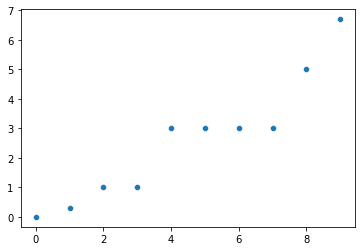

In [5]:
ax = sns.scatterplot(x=range(10), y=np.sort(spectral_clusterer.get_eigvals()))

K means clustering. First four eigenvalues are close to zero, so assume 4 clusters, using 1st, 2nd, 3rd (omitting zeroth) eigenvectors.

In [9]:
labels = spectral_clusterer.get_kmeans_clusters(n_clusters=4, start_evec=1, n_evec=3)
pd.DataFrame([[x,y] for x,y in zip(node_ids, labels)])

,0,1
0,n0,3
1,n1,3
2,n2,3
3,n3,1
4,n4,1
5,n5,1
6,n6,2
7,n7,2
8,n8,0
9,n9,0


In [7]:
colours = ['red', 'green', 'blue', 'yellow']
node_colours = {x:colours[y] for x,y in zip(node_ids, labels)}
for node in data['nodes']:
    id = node['data']['id']
    node['data']['colour'] = node_colours[id]

cytoscape_clust = ic.CytoscapeWidget()
cytoscape_clust.graph.add_graph_from_json(data)
cytoscape_clust.set_style([{
                        'selector': 'node',
                        'css': {
                            'content': 'data(name)',
                            'text-valign': 'center',
                            'color': 'white',
                            'text-outline-width': 2,
                            'text-outline-color': 'green',
                            'background-color': 'data(colour)'
                        }
                        },
                        {
                        'selector': ':selected',
                        'css': {
                            'background-color': 'black',
                            'line-color': 'black',
                            'target-arrow-color': 'black',
                            'source-arrow-color': 'black',
                            'text-outline-color': 'black'
                        }}
                        ])
display(cytoscape_clust)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…